Sourse of Data [Car Ratings and Reviews](https://www.kaggle.com/datasets/ankkur13/edmundsconsumer-car-ratings-and-reviews?resource=download&select=Scraped_Car_Review_kia.csv)

## Imports

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', None)

## Read Data

[KIA](https://drive.google.com/file/d/12OByNwCtxYI2B4LIIsmNZRFKFzkc2Ufv/view?usp=sharing)

In [ ]:
# get the file from google drive
! gdown -- 12OByNwCtxYI2B4LIIsmNZRFKFzkc2Ufv

In [ ]:
kia = pd.read_csv('Scraped_Car_Review_kia.csv', sep=',', index_col=0, lineterminator='\n', )
print(kia.shape)
kia.head(1)

(5988, 6)


,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating\r
0,on 04/16/18 01:23 AM (PDT),Reginald Gayden,2017 Kia Optima Hybrid Sedan Premium 4dr Sedan (2.0L 4cyl gas/electric hybrid 6A),Best Value Hybrid,"Bought 2017 Optima Hybrid in November 17. It was the only Hybrid Optima on the lot out of dozens of gas ones. I had been comparing Accord, Camry, and Malibu Hybrids and read the Optima Hybrid got 46 mpg on the hwy. That was only 2 or 3 miles per gallon less than the best of them so I did some pricing. My choice was for the 26,800 premium with pretty standard features, good radio with Android Audio and SiriusXM, dual zone climate control, tilt, cruise control,pwr windows and Door locks. At the time of purchase, there was a $5,000 rebate offered. I could not believe it. All this car for less than a Prius prime. I have driven it to over 18k miles in 6 months after taking several trips and I really enjoy and appreciate this car. My first trip was from Phoenix to Vegas. Did it on one tank of gas. The car went 828 miles. Very impressive! Really like having a 6 speed transmission instead of a CVT. Driven properly there are days when it averages 60 to 61 mpg city hwy mix. It can go up to 80mph in electric mode. 10 year 100 k warranty and a 5star safety rating I think the value is unbeatable.",5.00


In [ ]:
# remane column with '\r'
kia.rename(columns={'Rating\r':'Rating'}, inplace=True)

In [ ]:
print(f'after removing {kia.duplicated().sum()} duplicated rows')

kia.drop_duplicates(inplace=True)
print(f'size of the file = {kia.shape[0]:,.0f} rows')

after removing 31 duplicated rows
size of the file = 5,957 rows


In [ ]:
df = kia.reset_index(drop=True).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Date    5957 non-null   object 
 1   Author_Name    5957 non-null   object 
 2   Vehicle_Title  5957 non-null   object 
 3   Review_Title   5957 non-null   object 
 4   Review         5957 non-null   object 
 5   Rating         5957 non-null   float64
dtypes: float64(1), object(5)
memory usage: 279.4+ KB


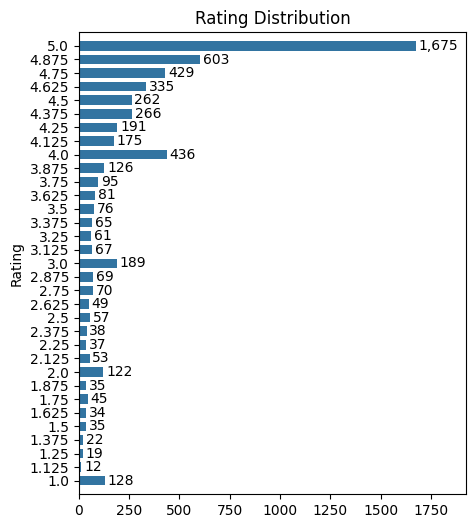

In [ ]:
plt.figure(figsize=(5, 6))
ax = sns.barplot(data=df['Rating'].value_counts(), width=0.7, orient='h')
ax.bar_label(ax.containers[0], fmt=(lambda x: f'{x:,.0f}'),
             padding=2, fontsize=10)
ax.set_xlim(0, df['Rating'].value_counts().values.max()*1.15)
ax.set_ylim(-1, df['Rating'].value_counts().shape[0])
ax.set(title=f'Rating Distribution')
ax.set(xlabel='');
plt.show()

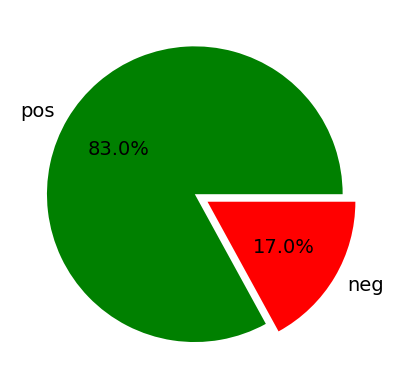

In [ ]:
# Assign a positive Sentiment for rating more than 3
df['Sentiment'] = np.where(df['Rating'] > 3 , 'pos', 'neg')

plt.pie(df['Sentiment'].value_counts(normalize=True), autopct='%1.1f%%',
        labels=df['Sentiment'].unique(), colors=['green', 'red'],
        explode = [0, 0.1], textprops={'fontsize': 14});

In [ ]:
print(f"Review with empty line = {df[df['Review'] ==' '].shape[0]}")
print(f"Review_Title with empty line = {df[df['Review_Title'] ==' '].shape[0]}")

Review with empty line = 29
Review_Title with empty line = 0


In [ ]:
df['Review'] = df['Review_Title'] +' '+ df['Review']
df[df['Review'] ==' ']

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Sentiment


## Preprocessing with removing stopwords

In [ ]:
# Import and load models
import spacy
nlp=spacy.load("en_core_web_sm")
import gensim
from gensim.utils import simple_preprocess

In [ ]:
stop_words =['a', 'about', 'after', 'after', 'all', 'also', 'am', 'an',
             'and', 'any', 'are', 'as', 'at', 'be', 'because', 'before',
             'between', 'both', 'by', 'do', 'down', 'during', 'each',
             'etc', 'ever', 'few', 'for', 'from', 'get', 'go', 'have',
             'he', 'her', 'here', 'hers', 'herself', 'him',  'himself', 'his',
             'how', 'i', 'ie', 'if', 'ii', 'in', 'in', 'into', 'is', 'it', 'its',
             'itself', 'just', 'me', 'my', 'myself', 'now', 'of', 'off', 'on',
             'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out',
             'out', 'own', 'per', 'same', 'she', 'so', 'some',
             'such', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves',
             'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to',
             'too', 'until', 'up', 'we', 'what', 'when', 'where', 'which', 'while',
             'who', 'whom', 'why', 'will', 'would', 'yet', 'you', 'your',
             'yours', 'yourself', 'yourselves'
 ]

In [ ]:
def preprocess_text(text):
    # Create object doc
    doc = nlp(text)

    # Convert stop_words to set for faster lookup
    stop_words_set = set(stop_words)

    # Get all the lemmas and remove stopwords in one loop
    lemmas = [token.lemma_ for token in doc if token.lemma_.lower() not in stop_words_set]

    # Remove punctuation and return tokens --> list
    tokens = gensim.utils.simple_preprocess(' '.join(lemmas), deacc=True, min_len=2, max_len=20)

    return tokens

In [ ]:
%%time
# apply a function to each row in the column 'Review'
df['text_lemma'] = df['Review'].apply(preprocess_text)

CPU times: user 2min 38s, sys: 761 ms, total: 2min 39s
Wall time: 2min 51s


In [ ]:
print(df['Review'][3])
print()
print(df['text_lemma'][3])

25miles per gallon hybrid  At 11k now in a lease for 39 months and it only gets 25mpg in city.  3 times dealerships say it just not broken in yet.  Do not buy!!! Very poor service follow up.  Filed case with corporate and still have yet to hear from them. Over a month now.

['mile', 'gallon', 'hybrid', 'lease', 'month', 'mpg', 'city', 'time', 'dealership', 'say', 'not', 'break', 'not', 'buy', 'very', 'poor', 'service', 'follow', 'file', 'case', 'with', 'corporate', 'still', 'hear', 'over', 'month']


In [ ]:
# remove words with length less 3
def more_2 (x):
    l = [el for el in x if len(el) > 2 or el in ['ok', 'no']]
    return l

df['text_lemma'] = df['text_lemma'].apply(more_2)

In [ ]:
# get the length of each review
df['len_text'] = df['text_lemma'].apply(lambda x :len(x))
df[['len_text']].describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.95, 0.99]
                          ).T.style.format(precision=0, thousands=',')

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
len_text,"5,957",54,43,1,4,12,30,48,67,111,249,536


In [ ]:
print(df[df['len_text'] <=1]['text_lemma'].count())
df[df['len_text'] <=1]

6


,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Sentiment,text_lemma,len_text
1557,on 07/29/16 08:10 AM (PDT),saheed adekunle,2015 Kia Optima Sedan LX 4dr Sedan (2.4L 4cyl 6A),Awesome,Awesome,5.00,pos,[awesome],1
2787,on 11/12/16 06:46 AM (PST),Ronald Perez,2011 Kia Sorento SUV EX 4dr SUV (3.5L 6cyl 6A),2011 sorento,2011 sorento,5.00,pos,[sorento],1
2932,on 05/19/16 20:25 PM (PDT),Maureen Morgan,2014 Kia Sorento SUV EX 4dr SUV AWD (3.3L 6cyl 6A),Sorento,Sorento,5.00,pos,[sorento],1
3013,on 05/05/16 16:11 PM (PDT),JENNIFER CANNON,2016 Kia Sorento SUV LX 4dr SUV (3.3L 6cyl 6A),Happy,Happy,4.00,pos,[happy],1
3020,on 04/08/16 06:38 AM (PDT),MELANIE TAYLOR,2016 Kia Sorento SUV EX 4dr SUV AWD (3.3L 6cyl 6A),Love it!!!!,Love it!!!!,5.00,pos,[love],1
5300,on 10/31/16 07:31 AM (PDT),Ken Carter,2009 Kia Borrego SUV Limited 4dr SUV 4WD (4.6L 8cyl 6A),Mr Big,Mr Big,5.00,pos,[big],1


In [ ]:
# get Vocabulary Size and Max Length for all corpus
common_words = ' '.join([' '.join(i) for i in df['text_lemma']])

print(f'All Vocabulary  = {len(common_words.split()):,.0f}')
print(f'Unique Values = {len(set(common_words.split())):,.0f}')

All Vocabulary  = 320,314
Unique Values = 10,698


In [ ]:
top_words = pd.DataFrame.from_dict(Counter(list(common_words.split())),
                                   orient='index').sort_values(by=0, ascending=False)[:20]

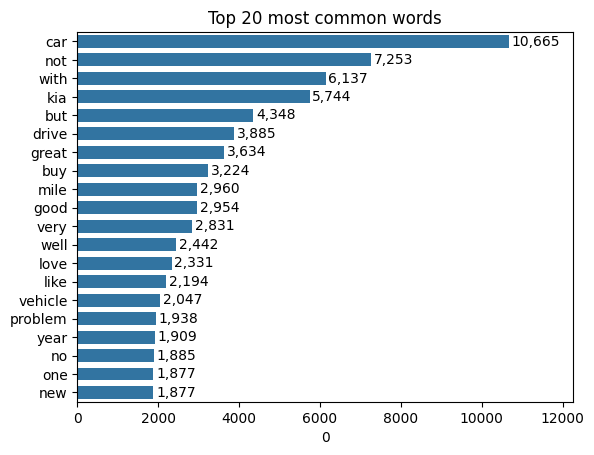

In [ ]:
ax = sns.barplot(data=top_words, y=top_words.index, x=top_words[0],
                  width=0.7, orient='h')
ax.bar_label(ax.containers[0], fmt=(lambda x: f'{x:,.0f}'),
             padding=2, fontsize=10)
ax.set_xlim(0, top_words[0].max()*1.15)
ax.set(title=f'Top 20 most common words')
ax.set(ylabel='');
plt.show()

## Phrases and Phraser

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
# get list of words
sentences = [row for row in df['text_lemma']]
print(sentences[:1])

[['best', 'value', 'hybrid', 'buy', 'optima', 'hybrid', 'november', 'hybrid', 'optima', 'lot', 'dozen', 'gas', 'one', 'compare', 'accord', 'camry', 'malibu', 'hybrids', 'read', 'optima', 'hybrid', 'mpg', 'hwy', 'mile', 'gallon', 'less', 'good', 'pricing', 'choice', 'premium', 'with', 'pretty', 'standard', 'feature', 'good', 'radio', 'with', 'android', 'audio', 'siriusxm', 'dual', 'zone', 'climate', 'control', 'tilt', 'cruise', 'control', 'pwr', 'window', 'door', 'lock', 'time', 'purchase', 'rebate', 'offer', 'could', 'not', 'believe', 'car', 'less', 'prius', 'prime', 'drive', 'over', 'mile', 'month', 'take', 'several', 'trip', 'really', 'enjoy', 'appreciate', 'car', 'first', 'trip', 'phoenix', 'vegas', 'one', 'tank', 'gas', 'car', 'mile', 'very', 'impressive', 'really', 'like', 'speed', 'transmission', 'instead', 'cvt', 'drive', 'properly', 'day', 'average', 'mpg', 'city', 'hwy', 'mix', 'can', 'mph', 'electric', 'mode', 'year', 'warranty', 'star', 'safety', 'rating', 'think', 'value', 

> **The Gensim Phrases package is used to automatically detect common phrases (bigrams) from a list of sentences.**
- [models.phrases](https://radimrehurek.com/gensim/models/phrases.html)
- [original_scorer](https://radimrehurek.com/gensim_3.8.3/models/phrases.html#gensim.models.phrases.original_scorer)

In [ ]:
# Configuring Phrases()
bigram_model = Phrases(sentences,
                       min_count=3,
                       threshold=10)

print(f'bigram_phrases = {len(bigram_model.export_phrases()):,.0f}')

bigram_phrases = 1,898


In [ ]:
# the total number of tokens (non-unique) in sentences
print(f'corpus_word_count = {bigram_model.corpus_word_count:,.0f}')

#the number of unique tokens in bigram_model
print(f'len_vocab =  {len(bigram_model.vocab):,.0f}')

corpus_word_count = 320,314
len_vocab =  162,783


In [ ]:
# "find_phrases" --> get all unique phrases and their scores
for bi, score in bigram_model.find_phrases(sentences).items():
    if 'mpg' in bi:
        print(f'bigram :{bi:<20} score : {score:.2f}')

bigram :mpg_hwy              score : 13.58
bigram :average_mpg          score : 42.69
bigram :mpg_city             score : 18.89
bigram :mpg_highway          score : 13.81
bigram :mpg_combine          score : 30.63
bigram :mpg_mixed            score : 36.88
bigram :avg_mpg              score : 44.12
bigram :hwy_mpg              score : 11.18
bigram :overstate_mpg        score : 23.07
bigram :mpg_depend           score : 14.83
bigram :advertised_mpg       score : 24.22
bigram :mpg_mix              score : 12.98


> **The goal of Phraser() is to reduce Phrases() memory consumption by discarding model state.**

In [ ]:
# Intializing Phraser() for bigram
bigram_phraser = Phraser(bigram_model)

# Extract bigrams from sentences
bigram_token = [bigram_phraser[sen] for sen in sentences]

In [ ]:
print(bigram_token[1])

['great_value', 'quite', 'luxurious', 'lot', 'money', 'great', 'performance', 'feel_like', 'great', 'buy']


In [ ]:
# Count and print most frequent words
unique_w = Counter([word for line in bigram_token for word in line])
print(f'Corpus(unigrams + bigrams) = {len(unique_w):,.0f}')

Corpus(unigrams + bigrams) = 12,532


In [ ]:
bigrams_list = Counter([word for line in bigram_token for word in line
                        if len(word.split('_')) > 1]).most_common(20)
df_bigrams = pd.DataFrame(bigrams_list, columns=['bigram', 'cnt'])

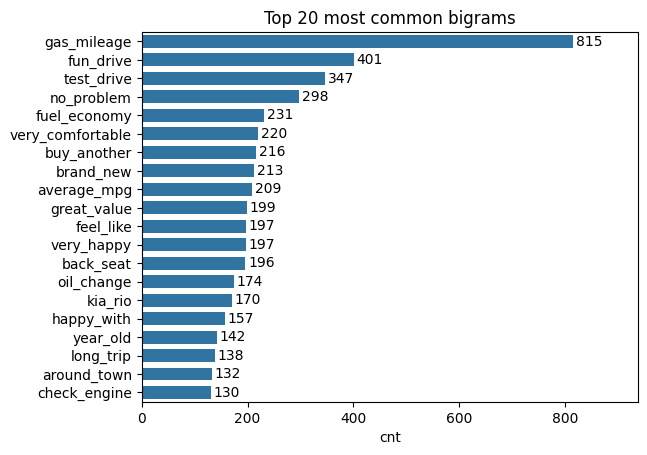

In [ ]:
ax = sns.barplot(data=df_bigrams, y=df_bigrams['bigram'], x=df_bigrams['cnt'],
                  width=0.7, orient='h')
ax.bar_label(ax.containers[0], fmt=(lambda x: f'{x:,.0f}'),
             padding=2, fontsize=10)
ax.set_xlim(0, df_bigrams['cnt'].max()*1.15)
ax.set(title=f'Top 20 most common bigrams')
ax.set(ylabel='');
plt.show()

**Word2vec model**

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
%%time
# Train word2vec
w2v_model = Word2Vec(bigram_token, min_count=1,
                     vector_size=111, workers=2,
                     negative=10,
                     window =3, sg = 0)

CPU times: user 6.53 s, sys: 41.7 ms, total: 6.57 s
Wall time: 3.64 s


In [ ]:
# key_to_index dict, .index_to_key list
len(w2v_model.wv.key_to_index)

12532

In [ ]:
w2v_model.wv.most_similar(positive=["kia"])

[('trade', 0.9336855411529541),
 ('review', 0.9316999912261963),
 ('decide', 0.9305050373077393),
 ('test_drive', 0.9274961948394775),
 ('model', 0.9207044839859009),
 ('owner', 0.9194434285163879),
 ('research', 0.9131141304969788),
 ('purchase', 0.9128234386444092),
 ('buy', 0.9100787043571472),
 ('buy_another', 0.9100775122642517)]

In [ ]:
w2v_model.wv.most_similar(negative=["kia"])

[('maintainence', 0.26166200637817383),
 ('theta', 0.18536388874053955),
 ('dimly', 0.12667584419250488),
 ('attest', 0.12387329339981079),
 ('burr', 0.11996648460626602),
 ('dampen', 0.11612182855606079),
 ('avereage', 0.09641153365373611),
 ('beyong', 0.09363695979118347),
 ('bargan', 0.0828406885266304),
 ('vvt', 0.07947719842195511)]

In [ ]:
w2v_model.wv.most_similar(positive=["problem"])

[('issue', 0.974520742893219),
 ('repair', 0.949425995349884),
 ('start', 0.9346940517425537),
 ('under_warranty', 0.9341394305229187),
 ('oil_change', 0.9263164401054382),
 ('part', 0.9234656095504761),
 ('recall', 0.9210528135299683),
 ('service', 0.9180387854576111),
 ('twice', 0.9129080772399902),
 ('time', 0.9115338325500488)]

In [ ]:
w2v_model.wv.similarity('kia', 'price')

0.7865309

In [ ]:
w2v_model.wv.doesnt_match(['car', 'day', 'road', 'problem'])

'road'

In [ ]:
w2v_model.wv.most_similar(positive=['car', 'price'], negative=['kia'], topn=5)

[('overall', 0.92696613073349),
 ('gas', 0.9180036783218384),
 ('fun_drive', 0.9143053889274597),
 ('gas_mileage', 0.9139323830604553),
 ('reliable', 0.9111064076423645)]

##  [WordCloud](https://amueller.github.io/word_cloud/index.html)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['car', 'kia'])

In [ ]:
car_logo = np.array(Image.open("kia_logo.png"))
car_pos_mask = np.array(Image.open("car_tr_3.png"))
car_neg_mask = np.array(Image.open("car_tr_1.png"))

In [ ]:
text = common_words # string with all words

In [ ]:
bigrams= bigram_phraser[text.split(' ')] # expects list of words
bigrams[:5]

['best_value', 'hybrid', 'buy', 'optima_hybrid', 'november']

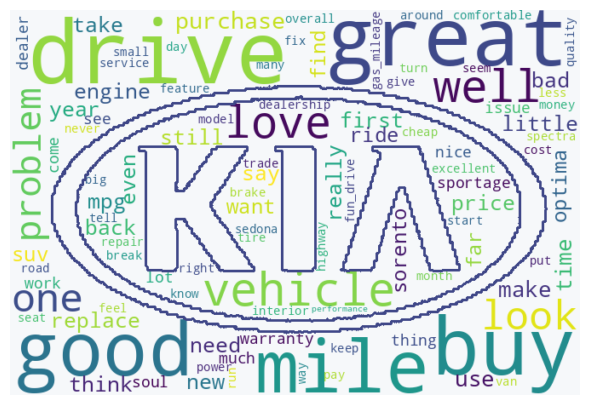

In [ ]:
plt.figure(figsize=(12, 5))
# Generate a word cloud image
wordcloud = WordCloud( stopwords=stopwords, background_color="#F6F8FA",
                       mask=car_logo, margin=1,
                       contour_width=3, contour_color='#3F4788',
                       max_words=100).generate(' '.join(bigrams)) # expects string

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud for Positive and Negative Reviews**

In [ ]:
df['bigrams'] = df['text_lemma'].apply(lambda x: bigram_phraser[x])

In [ ]:
pos_text = ' '.join(df[df['Sentiment'] == 'pos']['bigrams'].apply(lambda x : ' '.join(x)))
neg_text = ' '.join(df[df['Sentiment'] == 'neg']['bigrams'].apply(lambda x : ' '.join(x)))
ps = set(pos_text.split())
ng = set(neg_text.split())

In [ ]:
only_pos = ps - ng
len(only_pos)

6613

In [ ]:
only_neg = ng - ps
len(only_neg)

1220

In [ ]:
pos_for_cloud = ' '.join([word for word in pos_text.split() if word in only_pos])
neg_for_cloud = ' '.join([word for word in neg_text.split() if word in only_neg])

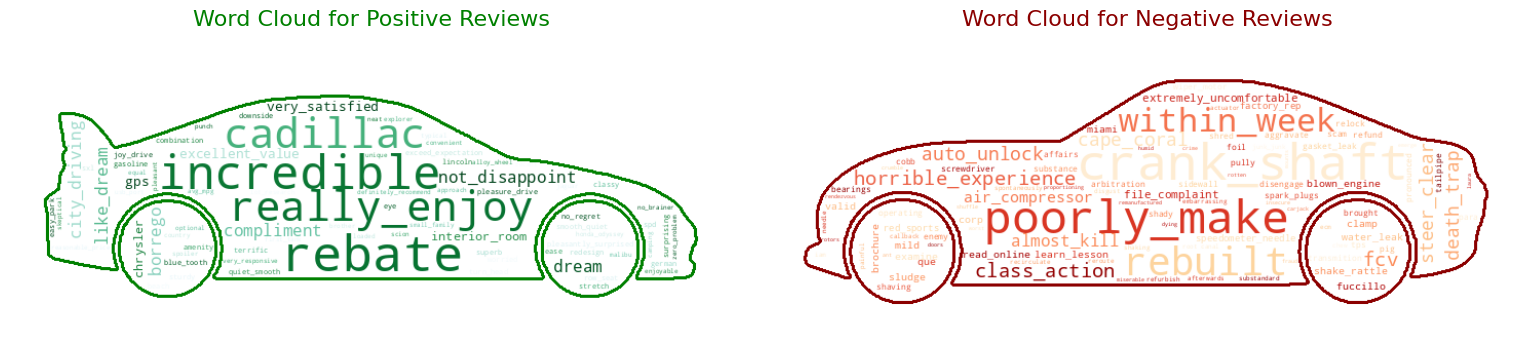

In [ ]:
def wordcloud_subplot(mask=[car_pos_mask, car_neg_mask],
                      text=[pos_for_cloud, neg_for_cloud],
                      colormaps=['BuGn', 'OrRd'],
                      contour_colors=['green', 'darkred'],
                      titles = ['Word Cloud for Positive Reviews',
                                'Word Cloud for Negative Reviews']):
    # Creating a figure and two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

    # Create a WordCloud and add to subplots
    for i, t, m, c, cc, tt in zip([0, 1], text, mask, colormaps,
                                  contour_colors, titles):
        wordcloud = WordCloud(stopwords=stopwords, max_words=100,
                              max_font_size=50, min_font_size=5,
                              background_color='white', colormap=c,
                              contour_width=2, contour_color=cc,
                              mask=m, random_state=2).generate(t)
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(tt, color=cc, fontsize=16)

    # Adjust the space between subplots
    plt.subplots_adjust(wspace=0)
    # Showing the figure
    plt.show()

wordcloud_subplot()

In [ ]:
Counter([word for word in pos_for_cloud.split()]).most_common(10)

[('rebate', 62),
 ('borrego', 56),
 ('incredible', 54),
 ('really_enjoy', 49),
 ('compliment', 49),
 ('not_disappoint', 47),
 ('dream', 45),
 ('cadillac', 43),
 ('city_driving', 42),
 ('like_dream', 40)]

In [ ]:
Counter([word for word in neg_for_cloud.split()]).most_common(10)

[('crank_shaft', 12),
 ('poorly_make', 10),
 ('rebuilt', 7),
 ('within_week', 7),
 ('horrible_experience', 7),
 ('class_action', 7),
 ('fcv', 7),
 ('steer_clear', 6),
 ('death_trap', 6),
 ('auto_unlock', 6)]